In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("bike_train.csv")
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [2]:
data['datetime']=pd.to_datetime(data['datetime'])

In [3]:
#년/월/일 추출
from datetime import datetime
data['year']=data.datetime.apply(lambda x : x.year)
data['month']=data.datetime.apply(lambda x : x.month)
data['day']=data.datetime.apply(lambda x : x.day)
data['hour']=data.datetime.apply(lambda x : x.hour)
data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


IndexError: index 2 is out of bounds for axis 0 with size 2

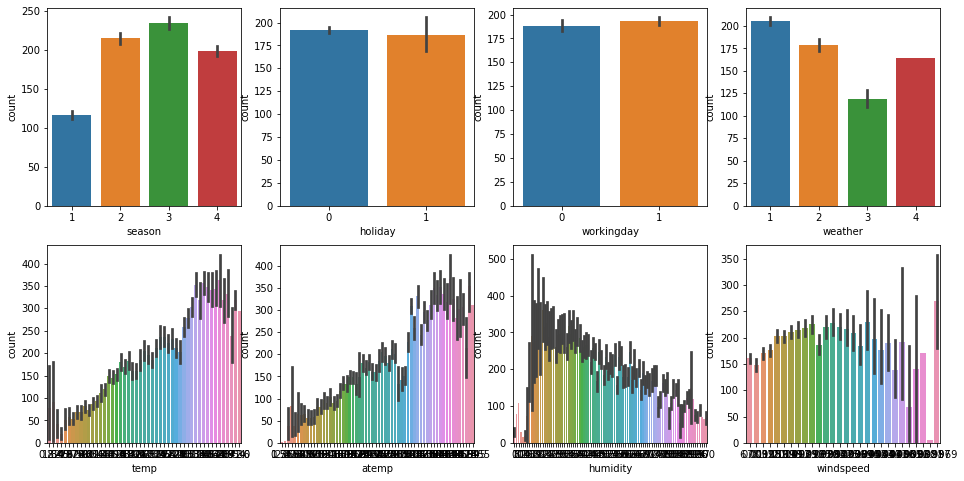

In [5]:
import seaborn as sns
fig, axs=plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features=data.drop(columns=['count', 'datetime', 'casual', 'registered']).columns

for i, feature in enumerate(cat_features):
    row=int(i/4)
    col=i%4
     
    sns.barplot(x=feature, y='count', data=data, ax=axs[row][col])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [7]:
X=data[['year', 'month', 'season', 'weather', 'day','hour', 'holiday','workingday']]
y=data['count']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)
lr=LinearRegression()
lr.fit(X_train, y_train)
pred=lr.predict(X_test)
mean_squared_error(y_test, pred)

In [ ]:
y.hist()

- log화

In [8]:
y_log=np.log1p(y)

<AxesSubplot:>

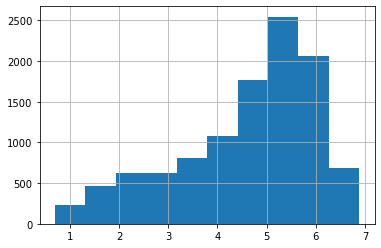

In [9]:
y_log.hist()

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y_log, test_size=0.3, random_state=0)
lr2=LinearRegression()
lr2.fit(X_train, y_train)
pred=lr2.predict(X_test)

#pred값은 log화되있는 값이므로 복귀
#y_test값도 log화 되어있으므로 복귀
y_test_exp=np.expm1(y_test)
pred_exp=np.expm1(pred)
mean_squared_error(y_test_exp, pred_exp)

X->더미, y->로그

In [16]:
X_features_ohe=pd.get_dummies(X, columns=['year', 'month', 'season', 'weather', 'day','hour', 'holiday','workingday'])

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X_features_ohe, y_log, test_size=0.3, random_state=0)

In [18]:
X_test

,year_2011,year_2012,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_0,holiday_1,workingday_0,workingday_1
6638,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
7975,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5915,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8050,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
5894,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5521,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
10626,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8126,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
1633,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [19]:
from sklearn.linear_model import Ridge, Lasso
lr=LinearRegression()
ridge=Ridge(alpha=10)
lasso=Lasso(alpha=0.01)

In [23]:
lr.fit(X_train, y_train)
pred_lr=lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_lr)))

ridge.fit(X_train, y_train)
pred_rd=ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_rd)))

0.6001874936551642
0.6005872072770071


In [22]:
lasso.fit(X_train, y_train)
pred_ls=lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred_ls)))

0.6410690307297331
